In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0]).reshape(-1, 1)  # XOR problem

N, ip_dim = X.shape
hidden_layer_dim = 4
W1 = np.random.random((ip_dim, hidden_layer_dim))  # Weights for input to hidden layer
op_dim = len(y.T)
W2 = np.random.random((hidden_layer_dim, op_dim))  # Weights for hidden to output layer

no_of_epochs = 10000
η = 1  # Learning rate

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

history = []

In [3]:
for _ in range(no_of_epochs):
    # Forward pass
    hidden_layer_output = sigmoid(np.dot(X, W1))  # Output of hidden layer
    output_layer_output = sigmoid(np.dot(hidden_layer_output, W2))  # Output of network
    
    # Compute the error
    error = y - output_layer_output
    delta_output = error * sigmoid_prime(output_layer_output)
    
    # Compute the error for hidden layer
    delta_hidden = np.dot(delta_output, W2.T) * sigmoid_prime(hidden_layer_output)
    
    # Update weights
    W1 += η * np.dot(X.T, delta_hidden)
    W2 += η * np.dot(hidden_layer_output.T, delta_output)
    
    # Track the loss
    history.append(np.sum(error ** 2))

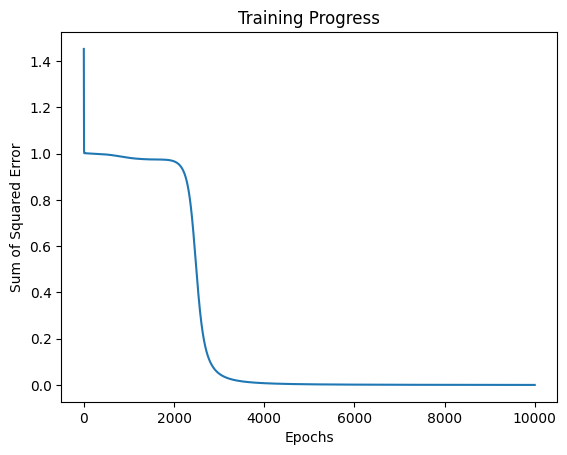

Input: [0 0], Prediction: [0], Actual: [0]
Input: [0 1], Prediction: [1], Actual: [1]
Input: [1 0], Prediction: [1], Actual: [1]
Input: [1 1], Prediction: [0], Actual: [0]


In [4]:
# Plotting the training progress
plt.plot(history)
plt.xlabel('Epochs')
plt.ylabel('Sum of Squared Error')
plt.title('Training Progress')
plt.show()

# Testing the trained network
for x, yy in zip(X, y):
    hidden_layer_prediction = sigmoid(np.dot(x, W1))  # Feedforward
    final_prediction = sigmoid(np.dot(hidden_layer_prediction, W2))  # Feedforward
    print(f"Input: {x}, Prediction: {(final_prediction > 0.5).astype(int)}, Actual: {yy}")
